In [88]:
import numpy as np
np.random.seed(0)

#Tensorflow
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

### Wczytanie danych

In [89]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


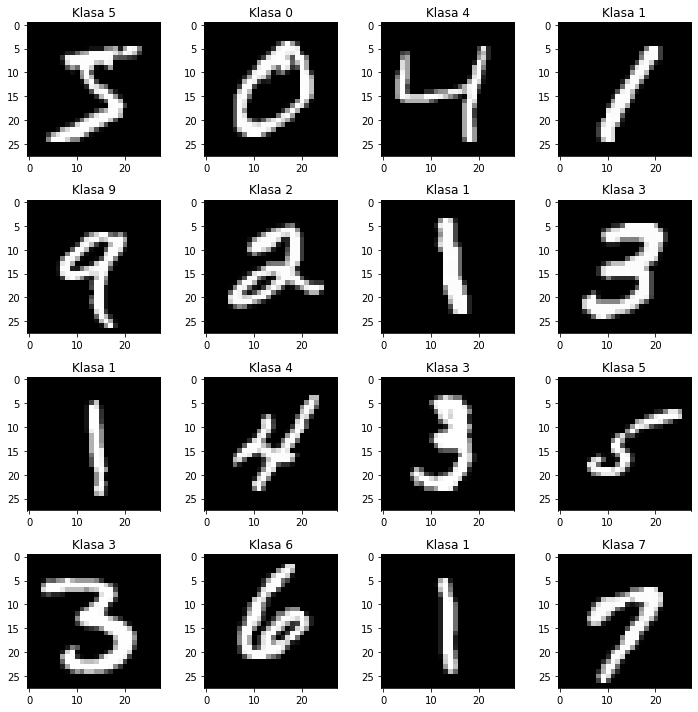

In [90]:
fig = plt.figure(figsize=(10, 10))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(X_train[idx], cmap='gray', interpolation='none')
    plt.title("Klasa {}".format(y_train[idx]))
    
plt.tight_layout()

In [91]:
if len(X_train.shape) == 3:
    num_pixels = X_train.shape[1] * X_train.shape[2]
    X_train = X_train.reshape( X_train.shape[0], num_pixels ).astype("float32")
    X_test = X_test.reshape( X_test.shape[0], num_pixels ).astype("float32")

print(X_train.shape, X_test.shape)

if np.max(X_train) > 1: X_train /= 255
if np.max(X_test) > 1: X_test /= 255

(60000, 784) (10000, 784)


In [92]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [93]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
num_classes

10

In [94]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [95]:
model = Sequential([
    Dense(512, input_dim=num_pixels, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 512)               401920    
                                                                 
 dense_32 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [96]:
history = model.fit(X_train, y_train,
                    batch_size=512, epochs=10, verbose=2,
                    validation_data=(X_test, y_test))

Epoch 1/10
118/118 - 1s - loss: 0.4151 - accuracy: 0.8864 - val_loss: 0.2138 - val_accuracy: 0.9385 - 1s/epoch - 10ms/step
Epoch 2/10
118/118 - 1s - loss: 0.1770 - accuracy: 0.9496 - val_loss: 0.1467 - val_accuracy: 0.9564 - 842ms/epoch - 7ms/step
Epoch 3/10
118/118 - 1s - loss: 0.1248 - accuracy: 0.9655 - val_loss: 0.1157 - val_accuracy: 0.9660 - 867ms/epoch - 7ms/step
Epoch 4/10
118/118 - 1s - loss: 0.0954 - accuracy: 0.9734 - val_loss: 0.1016 - val_accuracy: 0.9706 - 822ms/epoch - 7ms/step
Epoch 5/10
118/118 - 1s - loss: 0.0750 - accuracy: 0.9791 - val_loss: 0.0865 - val_accuracy: 0.9747 - 825ms/epoch - 7ms/step
Epoch 6/10
118/118 - 1s - loss: 0.0603 - accuracy: 0.9836 - val_loss: 0.0807 - val_accuracy: 0.9767 - 838ms/epoch - 7ms/step
Epoch 7/10
118/118 - 1s - loss: 0.0497 - accuracy: 0.9867 - val_loss: 0.0725 - val_accuracy: 0.9781 - 814ms/epoch - 7ms/step
Epoch 8/10
118/118 - 1s - loss: 0.0411 - accuracy: 0.9891 - val_loss: 0.0698 - val_accuracy: 0.9790 - 784ms/epoch - 7ms/step
Ep

In [97]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("MLP Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.0674835592508316
Test accuracy: 0.9793999791145325
MLP Error: 2.06%


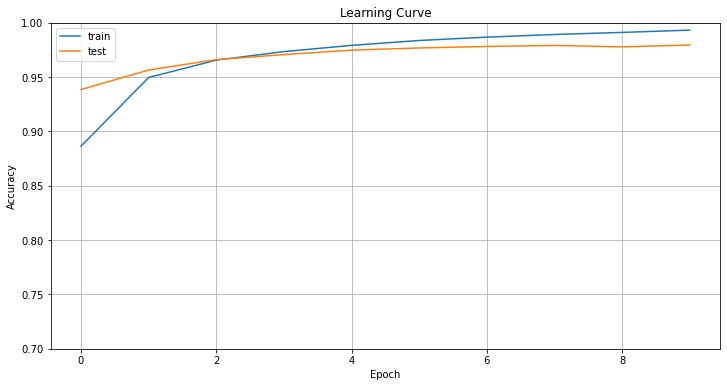

In [98]:
def draw_learning_curve(history, key='accuracy', ylim=(0.8, 1.01)):
    plt.figure(figsize=(12,6))
    
    plt.plot( history.history[key] )
    plt.plot( history.history['val_' + key] )
    
    plt.title('Learning Curve')
    plt.ylabel(key.title())
    plt.xlabel('Epoch')
    plt.ylim(ylim)
    plt.legend(['train', 'test'], loc='best')
    plt.grid()
   
    plt.show()
    
draw_learning_curve(history, 'accuracy', ylim=(0.7, 1.))

In [99]:
model = Sequential([
    Dense(512, input_dim=num_pixels, activation='relu'),
    Dense(256, activation='relu'),
    Dense(num_classes, kernel_initializer='normal', activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 512)               401920    
                                                                 
 dense_34 (Dense)            (None, 256)               131328    
                                                                 
 dense_35 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [100]:
history = model.fit(X_train, y_train,
          batch_size=1024, epochs=10, verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/10
59/59 - 1s - loss: 0.5512 - accuracy: 0.8593 - val_loss: 0.2320 - val_accuracy: 0.9336 - 1s/epoch - 21ms/step
Epoch 2/10
59/59 - 1s - loss: 0.1955 - accuracy: 0.9443 - val_loss: 0.1539 - val_accuracy: 0.9547 - 820ms/epoch - 14ms/step
Epoch 3/10
59/59 - 1s - loss: 0.1333 - accuracy: 0.9624 - val_loss: 0.1210 - val_accuracy: 0.9630 - 882ms/epoch - 15ms/step
Epoch 4/10
59/59 - 1s - loss: 0.0970 - accuracy: 0.9717 - val_loss: 0.1013 - val_accuracy: 0.9689 - 823ms/epoch - 14ms/step
Epoch 5/10
59/59 - 1s - loss: 0.0770 - accuracy: 0.9772 - val_loss: 0.0854 - val_accuracy: 0.9730 - 882ms/epoch - 15ms/step
Epoch 6/10
59/59 - 1s - loss: 0.0587 - accuracy: 0.9828 - val_loss: 0.0789 - val_accuracy: 0.9766 - 926ms/epoch - 16ms/step
Epoch 7/10
59/59 - 1s - loss: 0.0474 - accuracy: 0.9866 - val_loss: 0.0738 - val_accuracy: 0.9766 - 825ms/epoch - 14ms/step
Epoch 8/10
59/59 - 1s - loss: 0.0375 - accuracy: 0.9892 - val_loss: 0.0714 - val_accuracy: 0.9791 - 820ms/epoch - 14ms/step
Epoch 9/10


In [103]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("MLP Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.07103123515844345
Test accuracy: 0.9786999821662903
MLP Error: 2.13%


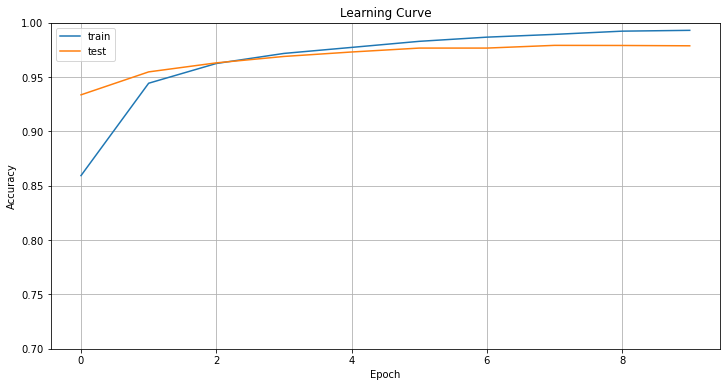

In [102]:
draw_learning_curve(history, 'accuracy', ylim=(0.7, 1.))

In [104]:
model = Sequential([
    Dense(512, input_dim=num_pixels, activation='relu'),
    Dropout(0.5), 
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, kernel_initializer='normal', activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 512)               401920    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_37 (Dense)            (None, 256)               131328    
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_38 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [108]:
history = model.fit(X_train, y_train,
          batch_size=1024, epochs=5, verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/5
59/59 - 1s - loss: 0.1068 - accuracy: 0.9678 - val_loss: 0.0797 - val_accuracy: 0.9747 - 1s/epoch - 17ms/step
Epoch 2/5
59/59 - 1s - loss: 0.0961 - accuracy: 0.9708 - val_loss: 0.0765 - val_accuracy: 0.9758 - 1s/epoch - 17ms/step
Epoch 3/5
59/59 - 1s - loss: 0.0833 - accuracy: 0.9749 - val_loss: 0.0708 - val_accuracy: 0.9759 - 998ms/epoch - 17ms/step
Epoch 4/5
59/59 - 1s - loss: 0.0749 - accuracy: 0.9767 - val_loss: 0.0662 - val_accuracy: 0.9793 - 976ms/epoch - 17ms/step
Epoch 5/5
59/59 - 1s - loss: 0.0699 - accuracy: 0.9781 - val_loss: 0.0655 - val_accuracy: 0.9797 - 1s/epoch - 18ms/step


In [109]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("MLP Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.0655219629406929
Test accuracy: 0.9797000288963318
MLP Error: 2.03%


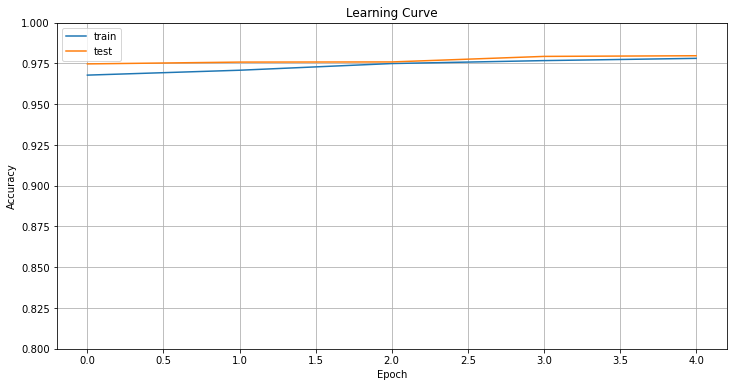

In [110]:
draw_learning_curve(history, 'accuracy', ylim=(0.8, 1.))

In [111]:
model = Sequential([
    Dense(512, input_dim=num_pixels, activation='relu'),
    Dropout(0.5), 
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, kernel_initializer='normal', activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 512)               401920    
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_40 (Dense)            (None, 256)               131328    
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_41 (Dense)            (None, 128)               32896     
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_42 (Dense)            (None, 10)              

In [116]:
history = model.fit(X_train, y_train,
          batch_size=1024, epochs=5, verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/5
59/59 - 1s - loss: 0.0653 - accuracy: 0.9797 - val_loss: 0.0631 - val_accuracy: 0.9797 - 1s/epoch - 18ms/step
Epoch 2/5
59/59 - 1s - loss: 0.0615 - accuracy: 0.9806 - val_loss: 0.0634 - val_accuracy: 0.9812 - 1s/epoch - 19ms/step
Epoch 3/5
59/59 - 1s - loss: 0.0583 - accuracy: 0.9809 - val_loss: 0.0590 - val_accuracy: 0.9833 - 1s/epoch - 19ms/step
Epoch 4/5
59/59 - 1s - loss: 0.0520 - accuracy: 0.9833 - val_loss: 0.0620 - val_accuracy: 0.9820 - 1s/epoch - 19ms/step
Epoch 5/5
59/59 - 1s - loss: 0.0526 - accuracy: 0.9837 - val_loss: 0.0591 - val_accuracy: 0.9833 - 1s/epoch - 18ms/step


In [117]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("MLP Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.05914580076932907
Test accuracy: 0.983299970626831
MLP Error: 1.67%


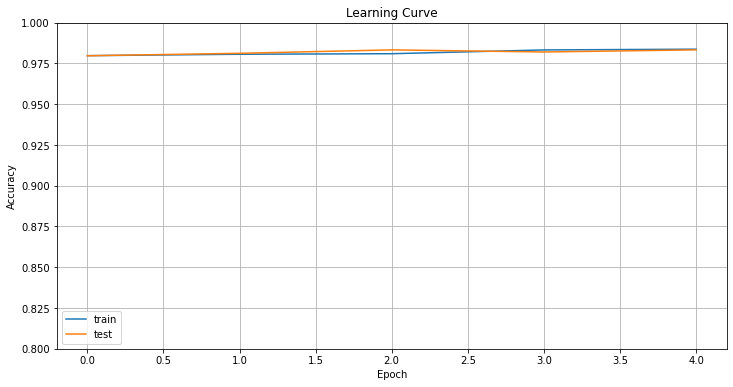

In [118]:
draw_learning_curve(history, 'accuracy', ylim=(0.8, 1.))

In [119]:
model = Sequential([
    Dense(512, input_dim=num_pixels, activation='relu'),
    Dropout(0.5), 
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, kernel_initializer='normal', activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 512)               401920    
                                                                 
 dropout_16 (Dropout)        (None, 512)               0         
                                                                 
 dense_44 (Dense)            (None, 512)               262656    
                                                                 
 dropout_17 (Dropout)        (None, 512)               0         
                                                                 
 dense_45 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [124]:
history = model.fit(X_train, y_train,
          batch_size=512, epochs=5, verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/5
118/118 - 2s - loss: 0.0498 - accuracy: 0.9843 - val_loss: 0.0572 - val_accuracy: 0.9822 - 2s/epoch - 13ms/step
Epoch 2/5
118/118 - 2s - loss: 0.0463 - accuracy: 0.9850 - val_loss: 0.0582 - val_accuracy: 0.9833 - 2s/epoch - 13ms/step
Epoch 3/5
118/118 - 1s - loss: 0.0461 - accuracy: 0.9846 - val_loss: 0.0595 - val_accuracy: 0.9826 - 1s/epoch - 12ms/step
Epoch 4/5
118/118 - 1s - loss: 0.0409 - accuracy: 0.9861 - val_loss: 0.0581 - val_accuracy: 0.9828 - 1s/epoch - 13ms/step
Epoch 5/5
118/118 - 2s - loss: 0.0367 - accuracy: 0.9879 - val_loss: 0.0552 - val_accuracy: 0.9832 - 2s/epoch - 13ms/step


In [125]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("MLP Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.055222466588020325
Test accuracy: 0.9832000136375427
MLP Error: 1.68%


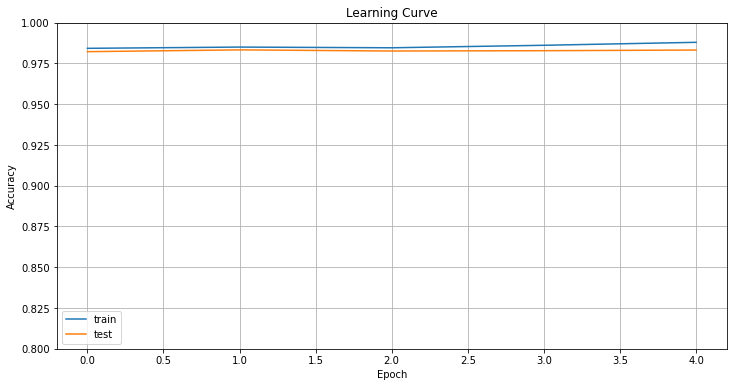

In [126]:
draw_learning_curve(history, 'accuracy', ylim=(0.8, 1.))